In [14]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import jinja2

In [2]:
df = pd.read_csv('data/external/the.csv', index_col=0)
df.index = df.index.astype('datetime64')
df

2023    2024    2025    2026
2022-04-04  81.547  58.200  48.600  30.610
2022-04-05  84.070  59.850  48.500  32.824
2022-04-06  82.920  60.540  47.960  33.438
2022-04-07  82.930  59.950  48.430  33.849
2022-04-08  84.585  61.050  47.850  34.534
2022-04-11  85.660  63.120  49.400  35.844
2022-04-12  88.000  64.520  50.920  36.909
2022-04-13  90.895  68.400  53.975  39.992
2022-04-14  85.460  65.850  53.310  40.388
2022-04-19  84.470  65.760  54.350  40.623
2022-04-20  87.250  69.380  56.470  41.714
2022-04-21  91.610  73.425  60.100  51.050
2022-04-22  89.500  73.180  60.400  49.324
2022-04-25  87.800  72.360  60.100  47.602
2022-04-26  87.690  69.420  57.775  47.186
2022-04-28  88.680  68.560  56.860  45.278
2022-04-29  88.270  69.590  57.550  43.604
2022-05-02  83.050  67.020  53.770  41.120
2022-05-03  88.202  71.032  60.115  45.592
2022-05-04  92.566  74.700  63.300  47.300
2022-05-05  99.540  78.720  64.950  47.986
2022-05-06  97.541  77.974  64.023  46.300
2022-05-09  89.032  70.831  59.164  43.016
2022-05-10  89.430  71.490  57.650  44.311
2022-05-11  90.145  71.420  56.120  42.194
2022-05-12  96.760  74.760  58.723  42.316
2022-05-13  92.663  72.717  57.253  41.025
2022-05-16  92.500  72.510  57.420  40.744
2022-05-17  93.450  71.880  57.700  40.411
2022-05-18  90.850  70.370  56.515  45.500
2022-05-19  89.700  69.100  55.550  45.500
2022-05-20  89.487  69.100  54.763  42.712
2022-05-23  86.590  67.700  53.310  42.500
2022-05-24  87.178  67.720  54.750  43.352
2022-05-25  88.867  68.454  55.013  43.942
2022-05-26  88.730  68.630  54.950  43.961
2022-05-27  88.427  67.838  54.183  42.700
2022-04-27  88.850  68.720  56.850  46.699

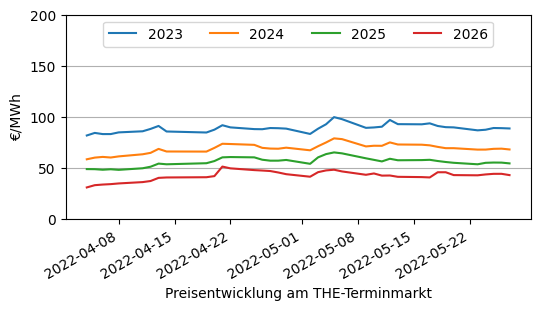

In [3]:
ax = df.plot(figsize=(6,3),
             xlabel="Preisentwicklung am THE-Terminmarkt",
             ylabel="€/MWh")

ax.legend(loc='upper center', ncol=4)
ax.set_ylim(0, 200)

plt.grid(True, axis='y')
plt.savefig("rendered/external/images/overview_gas.png", bbox_inches='tight')
plt.show()

In [4]:
ax = df.plot(figsize=(6,3),
             xlabel="Preisentwicklung im Frontjahrkontrakt für Baseload",
             ylabel="€/MWh")

ax.legend(loc='upper center', ncol=4)
ax.set_ylim(0, 200)

plt.grid(True, axis='y')
plt.savefig("rendered/external/images/overview_strom_base.png", bbox_inches='tight')
plt.show()

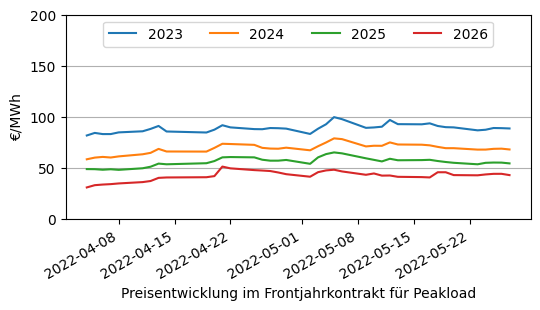

In [5]:
ax = df.plot(figsize=(6,3),
             xlabel="Preisentwicklung im Frontjahrkontrakt für Peakload",
             ylabel="€/MWh")

ax.legend(loc='upper center', ncol=4)
ax.set_ylim(0, 200)

plt.grid(True, axis='y')
plt.savefig("rendered/external/images/overview_strom_peak.png", bbox_inches='tight')
plt.show()

In [6]:
def plot_hbar(df:pd.DataFrame, colors:list, caption:str):
    dfx = df - 50
    ax = dfx.plot.barh(figsize=(3,2),
                      color=colors)

    ax.set_xlim(-50, 50)
    ax.set_xticklabels([])
    ax.set_axisbelow(True)

    for pos in ['right', 'top', 'bottom', 'left']:
        plt.gca().spines[pos].set_visible(False)
    #
    for tick in ax.xaxis.get_major_ticks():
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)
        tick.label1.set_visible(False)
        tick.label2.set_visible(False)

    for tick in ax.yaxis.get_major_ticks():
        tick.tick1line.set_visible(False)

    plt.grid(True, axis='x')
    plt.xlabel(caption)
    plt.xticks(rotation=0)

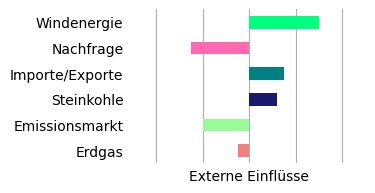

In [7]:
# df = pd.Series({
#     'Marktsentiment' : 80,
#     'Strom' : 30,
#     'Steinkohle' : 65,
#     'Rohöl': 62,
# })

df = pd.read_csv("data/external/outlook_strom.csv", index_col=0).iloc[:,0]

plot_hbar(df, colors=['lightcoral', 'palegreen', 'midnightblue', 'teal', 'hotpink', 'springgreen'], caption="Externe Einflüsse")

plt.savefig('rendered/external/images/outlook_strom.png', bbox_inches='tight')
plt.show()

In [8]:
df = pd.read_csv("data/external/outlook_gas.csv", index_col=0).iloc[:,0]
plot_hbar(df, colors=['forestgreen', 'lightsteelblue', 'saddlebrown', 'midnightblue'], caption="Externe Einflüsse")
plt.savefig('rendered/external/images/outlook_gas.png', bbox_inches='tight')
plt.show()

In [9]:
df = pd.read_csv('data/external/outlook_strom_preis.csv', index_col=0)
_, ax = plt.subplots()

col_price = 1
col_tendency = 0

for i, v in enumerate(df.iloc[:, col_price]):
    ax.text(55, i, str(v))

plot_hbar(df.iloc[:, col_tendency], colors=['darkgoldenrod', 'slategray'], caption="Preistendenz (basiert auf Charttechnik)")

# df.to_csv("data/external/outlook_preis.csv", index=True)

plt.savefig('rendered/external/images/outlook_strom_preistendenz.png', bbox_inches='tight')
plt.show()

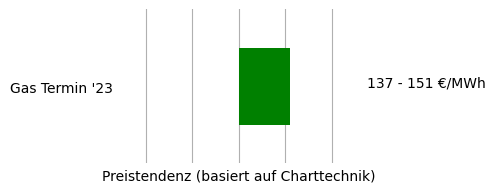

In [10]:
df = pd.read_csv('data/external/outlook_gas_preis.csv', index_col=0)
_, ax = plt.subplots()

col_price = 1
col_tendency = 0

for i, v in enumerate(df.iloc[:, col_price]):
    ax.text(55, i, str(v))

plot_hbar(df.iloc[:, col_tendency], colors=['green'], caption="Preistendenz (basiert auf Charttechnik)")

# df.to_csv("data/external/outlook_preis.csv", index=True)

plt.savefig('rendered/external/images/outlook_gas_preistendenz.png', bbox_inches='tight')
plt.show()

In [11]:
control = pd.read_csv("data/external/control.csv", index_col=0)
kwargs = {}
for kw in control.index:
    kwargs[kw] = control.loc[kw][0]\
                    .replace("%", "\%")

template_env = jinja2.Environment(loader=jinja2.FileSystemLoader("templates/external"))

# nem ca vao jinja no tu tinh
# locs = {
#     'outlook_gas' : 'chapters/1_outlook/gas.tex',
#     'outlook_strom' : 'chapters/1_outlook/strom.tex',
# }

locs = [
    "chapters/1_outlook/gas.tex",
    "chapters/1_outlook/strom.tex",
    "chapters/2_overview/gas.tex",
    "chapters/2_overview/strom.tex",
    "header/header.tex"
]

In [12]:
for loc in locs:
    template = template_env.get_template(loc)
    with open(f"rendered/external/{loc}", 'w') as f:
        f.write(template.render(**kwargs))

In [15]:
os.chdir("rendered/external")

In [18]:
os.popen("make all")